In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [ ]:
train_images = train_data.data.float() / 255.0
test_images = test_data.data.float() / 255.0

train_labels = train_data.targets
test_labels = test_data.targets

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

In [ ]:
train_labels = train_labels[torch.randperm(len(train_labels))]

In [ ]:
class Model(nn.Module):

  def __init__(self, hid_nodes=256):
    super().__init__()
    self.fc1 = nn.Linear(784, hid_nodes)
    self.fc2 = nn.Linear(hid_nodes, hid_nodes)
    self.output = nn.Linear(hid_nodes, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = self.output(x)
    return F.log_softmax(x, dim=1)

In [ ]:
model = Model()
crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 2000

train_losses = []
test_losses = []
epoch_list = []

batch_ind = 0
batch_size = 1000

In [ ]:
for epoch in range(epochs):

  epoch_list.append(epoch)

  train_loss = 0.0

  while (batch_ind + batch_size) <= len(train_images.view(-1, 784)):

    batch_images = train_images[batch_ind:batch_ind + batch_size, :, :]

    batch_labels = train_labels[batch_ind:batch_ind + batch_size]

    batch_ind += batch_size

    model.zero_grad()

    output = model(batch_images)

    loss = crit(output, batch_labels)

    loss.backward()

    train_loss += loss.item()

    optimizer.step()

  test_outputs = model(test_images)

  test_loss = crit(test_outputs, test_labels)

  test_losses.append(test_loss.item())
  train_losses.append(train_loss)

  batch_ind = 0

In [ ]:
# train_lost_list = []
# cnt = 0
# loss_cum = 0
# for loss_ind in range(len(train_losses)):

#   loss_cum+=train_losses[loss_ind]

#   if cnt == 58:
#     train_lost_list.append(loss_cum)
#     loss_cum = 0
#     cnt = 0
#   else:
#     cnt+=1

# print(len(train_lost_list))

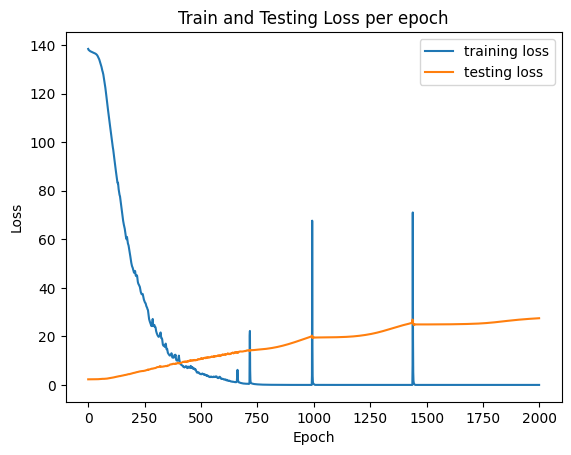

In [ ]:
plt.plot(epoch_list, train_losses, label='training loss')
plt.plot(epoch_list, test_losses, label='testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Testing Loss per epoch')
plt.legend()
plt.show()